In [1]:
import warnings
warnings.filterwarnings('ignore')

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Developing

In [44]:
def gd_with_momentum(func, dfs, init_pos, lr, momentum, max_iter):
    v = np.array([0, 0])
    pos = init_pos
    for i in range(max_iter):
        grad = np.array([f(*pos) for f in dfs])
        v = momentum * v + lr * grad
        pos = pos - v
    return pos

In [45]:
def adam(func, dfs, init_pos, max_iter, lr, beta1, beta2, epsilon):
    v = np.array([0, 0])
    s = np.array([0, 0])
    pos = init_pos
    for i in range(max_iter):
        grad = np.array([f(*pos) for f in dfs])
        v = beta1 * v + (1 - beta1) * grad
        s = beta2 * s + (1 - beta2) * (grad ** 2)
        v_hat = v / (1 - beta1 ** (i + 1))
        s_hat = s / (1 - beta2 ** (i + 1))
        pos = pos - lr * v_hat / (np.sqrt(s_hat) + epsilon)
    return pos

# Using functions

In [280]:
# def function
def f(x, y):
    return x**2 + y**2 - 2 * x * y

# def deriv by x
def df_x(x, y):
    return 2 * x - 2 * y

# def deriv by y
def df_y(x, y):
    return 2 * y - 2 * x

dfs = np.array([df_x, df_y])

In [281]:
init_pos = np.array([5, 1])
lr = 0.001
max_iter = 10000

In [282]:
momentum = 0.9

In [283]:
gd_with_momentum(f, dfs, init_pos, lr, momentum, max_iter)

array([3., 3.])

In [284]:
beta1 = 0.9
beta2 = 0.999
epsilon = 10**(-8)

In [285]:
adam(f, dfs, init_pos, max_iter, lr, beta1, beta2, epsilon)

array([3., 3.])

In [286]:
from scipy.optimize import minimize

In [287]:
def f_for_minimize(params):
    return f(*params)

In [288]:
minimize(f_for_minimize, init_pos).x

array([2.99999999, 3.00000001])

# Visualisation

## For GD

In [289]:
def gd_with_momentum_vis(func, dfs, init_pos, lr, momentum, max_iter):
    v = np.array([0, 0])
    pos = init_pos
    history = [func(*init_pos)]
    for i in range(max_iter):
        grad = np.array([f(*pos) for f in dfs])
        v = momentum * v + lr * grad
        pos = pos - v
        history.append(func(*pos))
        if abs(history[-1] - history[-2]) < 10**(-3):
            break
    return history

In [290]:
gs_history = gd_with_momentum_vis(f, dfs, init_pos, lr, momentum, max_iter)

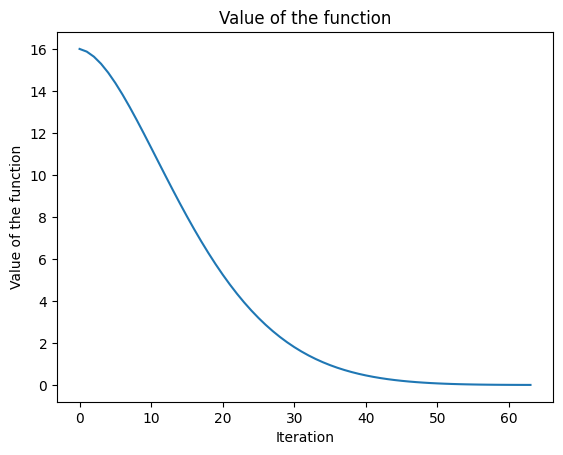

In [291]:
plt.plot(range(len(gs_history)), gs_history)
plt.title('Value of the function')
plt.xlabel('Iteration')
plt.ylabel('Value of the function')
plt.show()

In [292]:
changes = []
for i, value in enumerate(gs_history[1:]):
    changes.append(gs_history[i] - value)

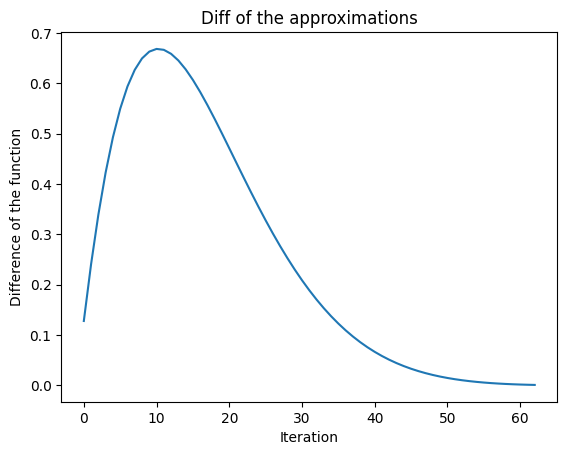

In [293]:
plt.plot(range(len(changes)), changes)
plt.title('Diff of the approximations')
plt.xlabel('Iteration')
plt.ylabel('Difference of the function')
plt.show()

## For ADAM

In [307]:
def adam_vis(func, dfs, init_pos, max_iter, lr, beta1, beta2, epsilon):
    v = np.array([0, 0])
    s = np.array([0, 0])
    pos = init_pos
    history = [func(*init_pos)]
    for i in range(max_iter):
        grad = np.array([f(*pos) for f in dfs])
        v = beta1 * v + (1 - beta1) * grad
        s = beta2 * s + (1 - beta2) * (grad ** 2)
        v_hat = v / (1 - beta1 ** (i + 1))
        s_hat = s / (1 - beta2 ** (i + 1))
        pos = pos - lr * v_hat / (np.sqrt(s_hat) + epsilon)
        history.append(func(*pos))
        if abs(history[-1] - history[-2]) < 10**(-3):
            break
    return history

In [308]:
adam_history = adam_vis(f, dfs, init_pos, max_iter, lr, beta1, beta2, epsilon)

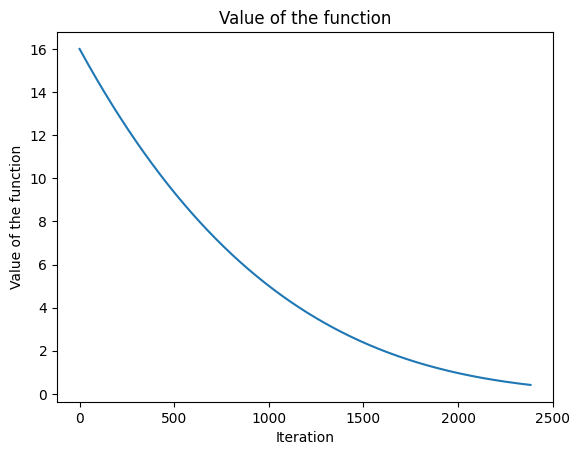

In [309]:
plt.plot(range(len(adam_history)), adam_history)
plt.title('Value of the function')
plt.xlabel('Iteration')
plt.ylabel('Value of the function')
plt.show()

In [302]:
changes = []
for i, value in enumerate(adam_history[1:]):
    changes.append(adam_history[i] - value)

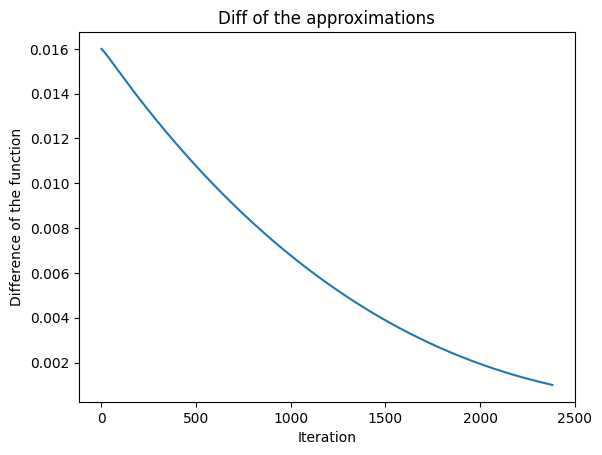

In [303]:
plt.plot(range(len(changes)), changes)
plt.title('Diff of the approximations')
plt.xlabel('Iteration')
plt.ylabel('Difference of the function')
plt.show()

Gradient descent is a basic method for minimization (maximization) of the function.
It's weakness is getting stuck in a local extremum.
Momentum algorithm add extra parameter to take into account previous updates of the parameters.
ADAM algorithm is an improvement of the searching extremum algorithm, which also takes into account updates of the parameters and individually for each parameter.

As it can be seen from the figures, gradient descent method has strong jumps in the value of the function, and ADAM is more monotonic and stable, but if is less fast